In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/isobel/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


original flawed model based only on w for 2 fireflies. Doesn't take theta into account


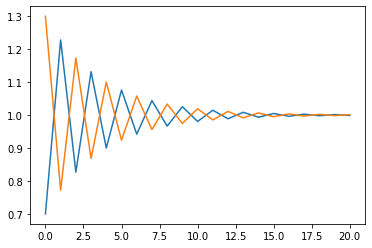

In [3]:
#want to plot w1 and w2 vs time
a = 0.88
w1_0 = 0.7
w2_0 = 1.3
w1 = []
w2 = []
t = [] #stores corresponding time values

t.append(0)
w1.append(w1_0)
w2.append(w2_0)

dw1 = lambda w1,w2: a*(w2-w1)
dw2 = lambda w1,w2: a*(w1-w2)

t_curr = t[0] #ongoing time variable
dt = 1 #time step
t_end = 20
w1_curr = w1[0]
w2_curr = w2[0]
for i in range(t_end//dt):
    w1.append(w1[i]+dw1(w1[i],w2[i])*dt)
    w2.append(w2[i]+dw2(w1[i],w2[i])*dt)

    t.append(t[i]+dt)

figure(1)
plot(t,w1)
plot(t,w2)

print('original flawed model based only on w for 2 fireflies. Doesn\'t take theta into account' )

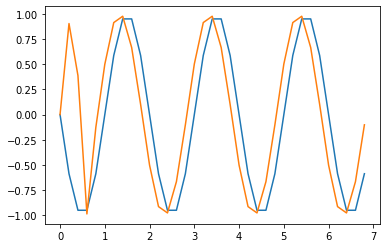

In [4]:
# Strogatz's model
import math
W = 0.5*2*pi #entrainment frequency
w = 0.9*2*pi #firefly's natural frequency
A = 5 #parameter
Th_0 = pi #initial phase of entrainment
th_0 = 0 #initial phase of firefly

dTh = W
dth = lambda Th,th: w + A*sin(Th-th)

Th = []
th = []
t = [] #stores corresponding time values

t.append(0)
Th.append(Th_0)
th.append(th_0)

#set initial conditions

t_curr = t[0] #ongoing time variable
dt = 0.2 #time step
t_end = 7
Th_curr = Th[0]
th_curr = th[0]
for i in range(math.floor(t_end//dt)):
    Th.append(Th[i]+dTh*dt)
    th.append(th[i]+dth(Th[i],th[i])*dt)
    t.append(t[i]+dt)

figure(1)
plot(t,sin(Th))
plot(t,sin(th))

#print('original flawed model based only on w for 2 fireflies. Doesn\'t take theta into account' )

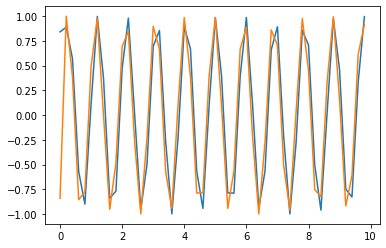

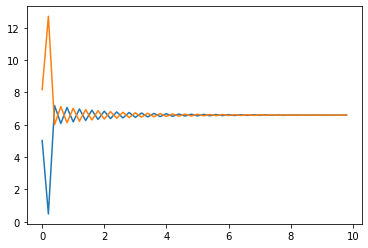

In [5]:
#Strogatz, good version

import math
W_0 = 0.8*2*pi #entrainment frequency
w_0 = 1.3*2*pi #firefly's natural frequency
A = 5 #parameter
Th_0 = 1 #initial phase of entrainment
th_0 = -1 #initial phase of firefly
a = 1 #scale factor

dTh = lambda Th,th: W_0 + A*sin(th-Th)
dth = lambda Th,th: w_0 + A*sin(Th-th)

#set initial conditions

Th = [Th_0]
th = [th_0]
t = [0] #stores corresponding time values
w = [w_0]
W = [W_0]

dt = 0.2 #time step
t_end = 10

for i in range(math.floor(t_end//dt)):
    Th.append(Th[i]+dTh(Th[i],th[i])*dt/a)
    th.append(th[i]+dth(Th[i],th[i])*dt/a)
    t.append(t[i]+dt)
    w.append(dth(Th[i],th[i]))
    W.append(dTh(Th[i],th[i]))

figure(1)
plot(t,sin(Th))
plot(t,sin(th))
figure(2)
plot(t,W)
plot(t,w)


[0.2, 0.1, 0.4, 0.2, 0.1, 0.4, 0.9, 0.8, 0.8, 0.2, 0.5, 0.3, 0.2, 0.1, 0.2, 0.9, 0.8, 0.8, 0.8, 0.2]
[0.9, 1.3, 1.0, 0.6, 1.1, 0.9, 0.8, 0.8, 0.9, 1.0, 0.9, 1.0, 1.4, 0.8, 0.8, 1.0, 1.2, 0.9, 1.3, 0.7]


[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


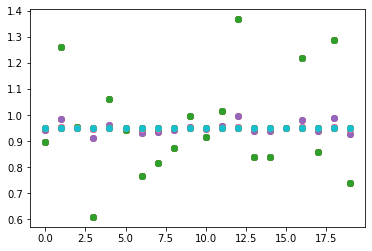

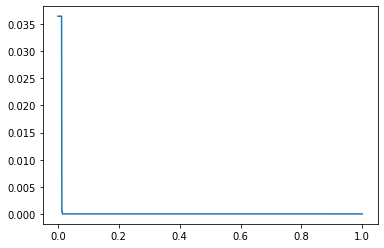

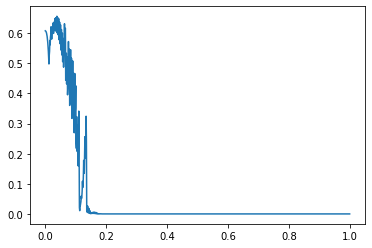

In [6]:
#version good

n = 20
a = 0.89
e = 0.2
dt = 0.001
MAXTIME = 1

import random
random.seed(4)

def update_omegas(omegas,a,flashed):
    n = len(omegas)
    orig = omegas.copy()
    for i in range(n):
        count = 0
        if not flashed[i]:
            for j in range(n):
                if flashed[j]:
                    count = count+1
                    omegas[i] += a*(orig[j] - orig[i])
#         if count != 0:
#             omegas[i] = omegas[i]/count
    return omegas


def update_thetas_time(time, omegas, thetas):
    thetas = [t + o*time for o,t in zip(omegas, thetas)]
    return thetas

def update_thetas_flash(thetas,a):
    theta_cp = thetas.copy()
    thetas = -e*sin([2*pi*theta for theta in theta_cp])
    return thetas

def fireflies(n,a):

    time = 0
    flashed = [False for _ in range(n)]
    flash = False
    thetas = [random.uniform(0,1) for _ in range(n)]
#    thetas = [0 for _ in range(n)]
    omegas = [random.gauss(1,0.2) for _ in range(n)]
#    omegas = [0.5 for _ in range(n)]
    var_w = []
    var_th = []
    
    print([round(theta,1) for theta in thetas])
    print([round(omega,1) for omega in omegas])
    print('\n')

    while (time < MAXTIME):
        if flash:
            thetas = update_thetas_flash(thetas,a)
            omegas = update_omegas(omegas,a,flashed)
            flash = False
        else:
            thetas = update_thetas_time(time, omegas, thetas)
        flashed = [False for _ in range(n)]
        for i in range(n):
            if thetas[i]>1:
                flashed[i] = True
                flash = True
#         print(flashed)
        synced = True
        for f in flashed:
            if not f:
                synced = False
#         if synced:
#             print(synced,round(time,2))
        thetas = [theta%1 for theta in thetas]
        time = time + dt
#         figure(1)
#         plot(range(n),thetas,'o')
        figure(2)
        plot(range(n),omegas,'o')
        #print([round(theta,1) for theta in thetas],round(time,2))
        var_th.append(var(sin([2*pi*theta for theta in thetas])))
        var_w.append(var(omegas))
#         if flash:
#             figure(3)
#             plot(time,flash,'o')
    t = linspace(0,MAXTIME,len(var_w))
    figure(3)  
    plot(t,var_w)
    figure(4)
    plot(t,var_th)
    print([round(theta,1) for theta in thetas])
    print([round(omega,1) for omega in omegas])
    
fireflies(n,a)


[0.13, 0.85, 0.76, 0.26, 0.5, 0.45, 0.65, 0.79, 0.09, 0.03, 0.84, 0.43, 0.76, 0.0, 0.45, 0.72, 0.23, 0.95, 0.9, 0.03, 0.03, 0.54, 0.94, 0.38, 0.22, 0.42, 0.03, 0.22, 0.44, 0.5, 0.23, 0.23, 0.22, 0.46, 0.29, 0.02, 0.84, 0.56, 0.64, 0.19, 0.99, 0.86, 0.12, 0.33, 0.72, 0.71, 0.94, 0.42, 0.83, 0.67, 0.3, 0.59, 0.88, 0.85, 0.51, 0.59, 0.03, 0.24, 0.8, 0.41, 0.17, 0.55, 0.7, 0.67, 0.37, 0.44, 0.51, 0.78, 0.52, 0.39, 0.49, 0.03, 0.04, 0.7, 0.98, 0.59, 0.39, 0.17, 0.5, 0.98, 0.77, 0.54, 0.86, 0.23, 0.51, 0.95, 0.58, 0.46, 0.27, 0.55, 0.96, 0.01, 0.78, 0.82, 0.89, 0.74, 0.81, 0.52, 0.56, 0.43]
[0.66, 8.71, 5.74, 2.08, 5.1, 4.9, 3.63, 3.53, 5.43, 6.27, 6.16, 4.64, 0.38, 2.37, 1.85, 5.89, 8.62, 8.0, 7.99, 8.18, 2.63, 8.43, 6.76, 0.92, 0.27, 0.24, 7.58, 2.57, 1.18, 6.29, 3.51, 0.79, 1.68, 5.32, 1.76, 2.8, 7.14, 4.6, 3.29, 4.79, 0.33, 3.93, 4.27, 1.96, 1.18, 9.01, 5.15, 2.17, 6.1, 8.19, 0.31, 0.28, 1.55, 7.22, 1.69, 7.08, 6.81, 5.49, 2.28, 9.76, 8.0, 5.21, 2.31, 6.52, 4.01, 5.8, 3.28, 6.35, 0.68, 3

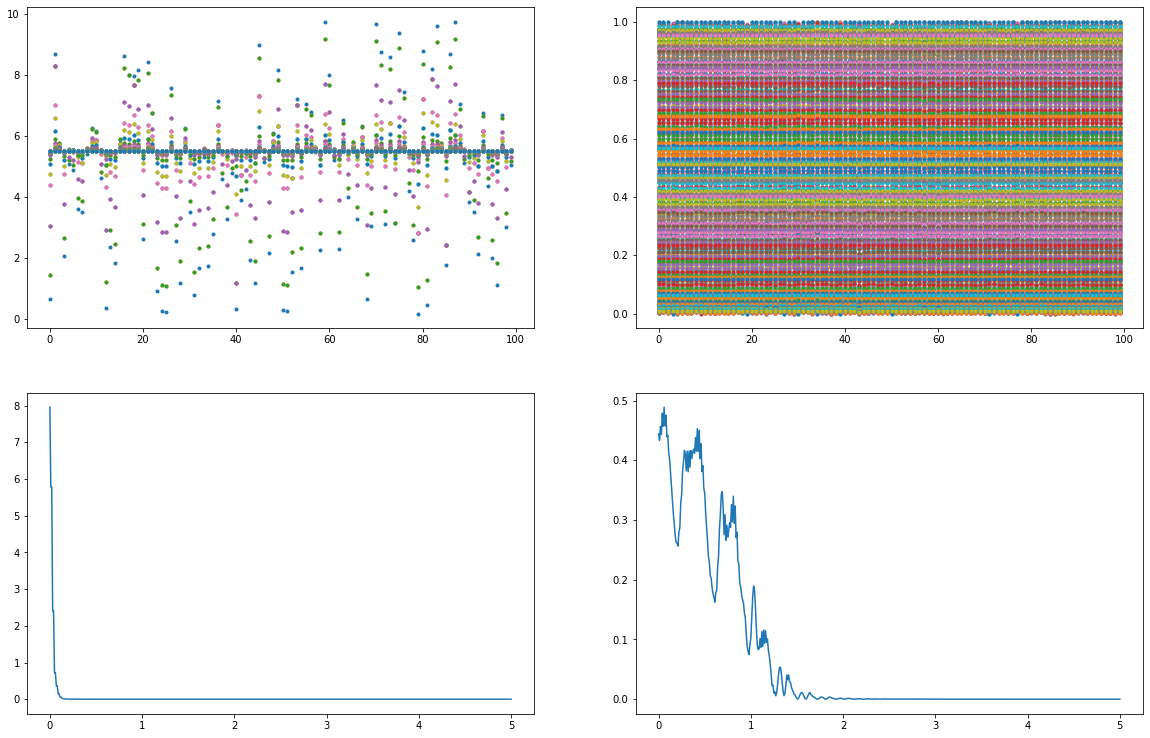

In [7]:
#GOOD WORKING MODEL
#200,0.02,0.001,0.001,1: oscillations
#200,0.5,0.001,0.001,1:oscillations
#200,0.005,0.1,0.001,1: monochromatic convergence

n = 100
a = 0.05
e = 0.03
dt = 0.01
MAXTIME = 5
fig,ax = subplots(2,2,figsize=(20,13))

import random
random.seed(1)

def update_omegas(omegas,a,flashed):
    n = len(omegas)
    orig = omegas.copy()
    for i in range(n):
        if not flashed[i]:
            for j in range(n):
                if flashed[j]:
                    omegas[i] += a*(orig[j] - orig[i])
    return omegas


def update_thetas_time(time, omegas, thetas):
    thetas = [t + o*dt for o,t in zip(omegas, thetas)]
    return thetas

def update_thetas_flash(thetas,a):
    theta_cp = thetas.copy()
    thetas = thetas-e*sin([2*pi*theta for theta in theta_cp])
    return thetas

def fireflies(n,a):

    time = 0
    flashed = [False for _ in range(n)]
    flash = False
    thetas = [random.uniform(0,1) for _ in range(n)]
    omegas = [random.uniform(0.1,10) for _ in range(n)]
#     thetas = [0.24,0.1,0.4]
#     omegas = [4,4,1]
#     omegas = [0.5 for _ in range(n)]
    var_w = []
    var_th = []
    
    print([round(theta,2) for theta in thetas])
    print([round(omega,2) for omega in omegas])
    print(mean(omegas))
    print('\n')

    while (time < MAXTIME):
        if flash:
            
#             if var(omegas)>0.1:
#                 omegas = update_omegas(omegas,a,flashed)
#                 thetas = update_thetas_flash(thetas,a)
            thetas = update_thetas_flash(thetas,a)
            omegas = update_omegas(omegas,a,flashed)
            
            flash = False
        else:
            thetas = update_thetas_time(time, omegas, thetas)
        assert(flash==False)
        flashed = [False for _ in range(n)]
        for i in range(n):
            if thetas[i]>=1:
                flashed[i] = True
                flash = True
                thetas[i] = thetas[i]%1
#         synced = True
#         for f in flashed:
#             if not f:
#                 synced = False
#         print(thetas,round(time,3))
        thetas = [(round(theta,4))%1 for theta in thetas]
#         print(thetas,round(time,3))
#         print('\n')
        time = time + dt
        ax[0,0].plot(range(n),omegas,'.')
#         plot(range(n),omegas,'o')
#         figure(3)
#         plot(range(n),thetas,'o')
        ax[0,1].plot(range(n),thetas,'.')
        var_th.append(var(sin([2*pi*theta for theta in thetas])))
        var_w.append(var(omegas))
#         if flash:
#             print([round(omega,2) for omega in omegas],[round(theta,2) for theta in thetas],round(time,3),flashed)
#         else:
#             print([round(omega,2) for omega in omegas],[round(theta,2) for theta in thetas],round(time,3))
        
    t = linspace(0,MAXTIME,len(var_w))
#     figure(4)  
#     plot(t,var_w)
#     figure(5)
#     plot(t,var_th)
    ax[1,0].plot(t,var_w)
    ax[1,1].plot(t,var_th)
    print([round(theta,2) for theta in thetas])
    print([round(omega,2) for omega in omegas])
    
fireflies(n,a)


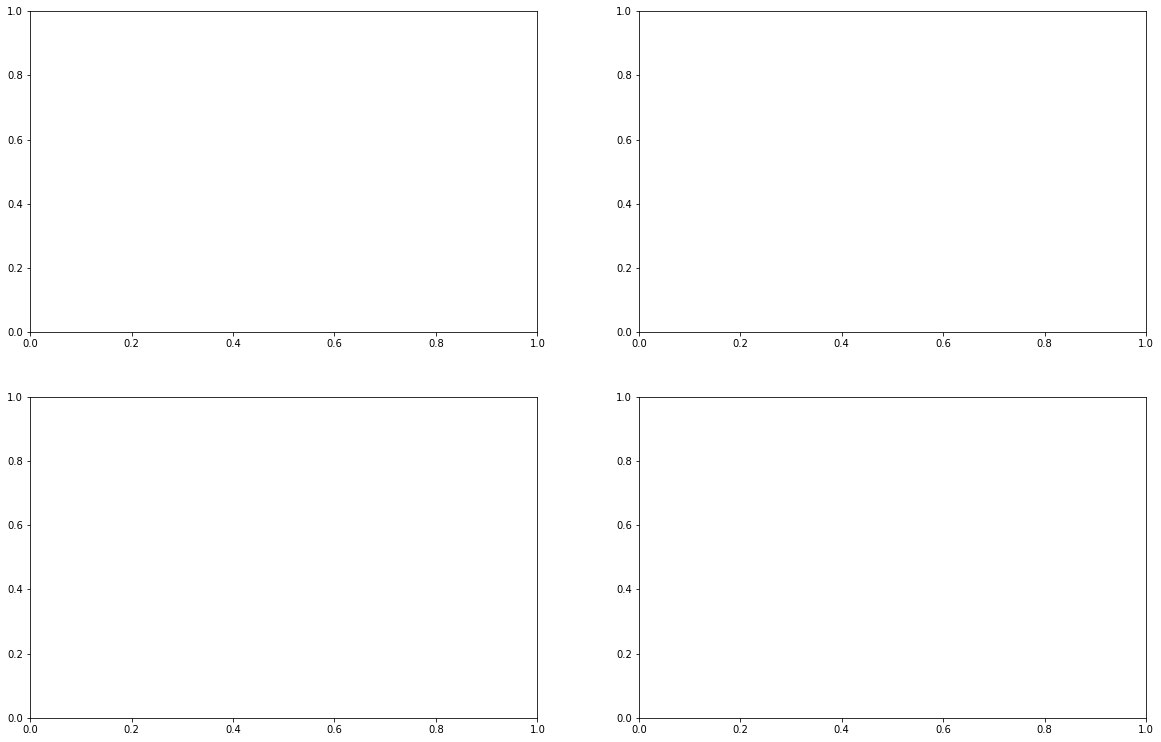

In [8]:
#Copy for animation attempts
import time

n = 100
a = 0.01
e = 0.03
dt = 0.01
MAXTIME = 1
fig,ax = subplots(2,2,figsize=(20,13))

import random
random.seed(1)

def update_omegas(omegas,a,flashed):
    n = len(omegas)
    orig = omegas.copy()
    for i in range(n):
        if not flashed[i]:
            for j in range(n):
                if flashed[j]:
                    omegas[i] += a*(orig[j] - orig[i])
    return omegas


def update_thetas_time(time, omegas, thetas):
    thetas = [t + o*dt for o,t in zip(omegas, thetas)]
    return thetas

def update_thetas_flash(thetas,a):
    theta_cp = thetas.copy()
    thetas = thetas-e*sin([2*pi*theta for theta in theta_cp])
    return thetas

def fireflies(n,a):

    time_var = 0
    flashed = [False for _ in range(n)]
    f_chars = [' ' for _ in range(n)]
    flash = False
    thetas = [random.uniform(0,1) for _ in range(n)]
    omegas = [random.uniform(0.1,10) for _ in range(n)]
    while (time_var < MAXTIME):
        if flash:
            thetas = update_thetas_flash(thetas,a)
            omegas = update_omegas(omegas,a,flashed)
            
            flash = False
        else:
            thetas = update_thetas_time(time_var, omegas, thetas)
        flashed = [False for _ in range(n)]
        f_chars = [' ' for _ in range(n)]
        for i in range(n):
            if thetas[i]>=1:
                flashed[i] = True
                f_chars[i] = '*'
                flash = True
                thetas[i] = thetas[i]%1
        thetas = [(round(theta,4))%1 for theta in thetas]
        time_var = time_var + dt
        print(f_chars,end='\r')
        time.sleep(0.05)
    
fireflies(n,a)
